### Imports 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Perceptron

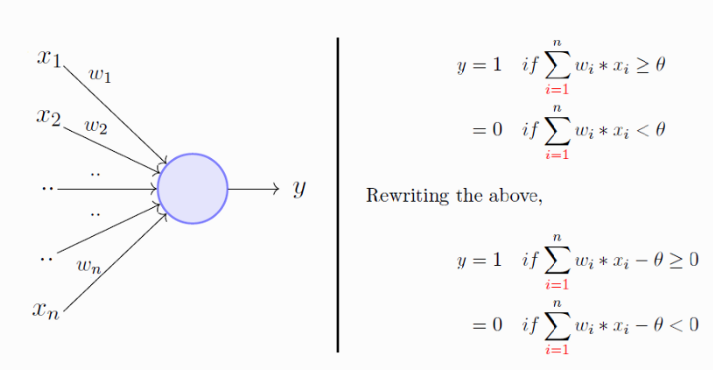

In [2]:
def perceptron(x, w, b):
    summation = np.dot(w,x) + b
    if summation>0:
        return 1
    else:
        return 0

## Logical Functions With Perceptron

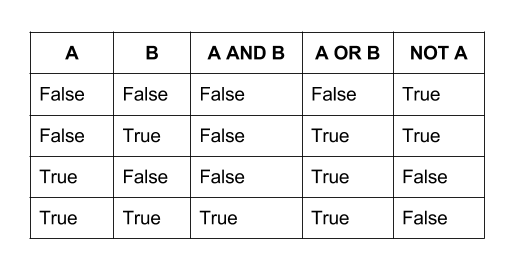

#### NOT

In [3]:
def NOT_percep(x):
    return perceptron(x, w=-1, b=0.5)

print("NOT(0) =",NOT_percep(0))
print("NOT(1) =",NOT_percep(1))

NOT(0) = 1
NOT(1) = 0


#### AND 

In [8]:
def AND_percep(x):
    w = np.array([1, 1])
    b = -1.5
    return perceptron(x, w, b)

example1 = np.array([1, 1])
example2 = np.array([1, 0])
example3 = np.array([0, 1])
example4 = np.array([0, 0])

print("AND({}, {}) = {}".format(1, 1, AND_percep(example1)))
print("AND({}, {}) = {}".format(1, 0, AND_percep(example2)))
print("AND({}, {}) = {}".format(0, 1, AND_percep(example3)))
print("AND({}, {}) = {}".format(0, 0, AND_percep(example4)))

AND(1, 1) = 1
AND(1, 0) = 0
AND(0, 1) = 0
AND(0, 0) = 0


#### OR

In [9]:
def OR_percep(x):
    w = np.array([1, 1])
    b = -0.5
    return perceptron(x, w, b)

# Test
example1 = np.array([1, 1])
example2 = np.array([1, 0])
example3 = np.array([0, 1])
example4 = np.array([0, 0])

print("OR({}, {}) = {}".format(1, 1, OR_percep(example1)))
print("OR({}, {}) = {}".format(1, 0, OR_percep(example2)))
print("OR({}, {}) = {}".format(0, 1, OR_percep(example3)))
print("OR({}, {}) = {}".format(0, 0, OR_percep(example4)))

OR(1, 1) = 1
OR(1, 0) = 1
OR(0, 1) = 1
OR(0, 0) = 0


#### XOR

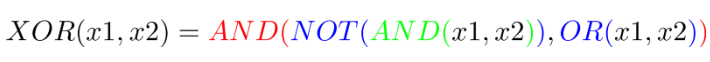

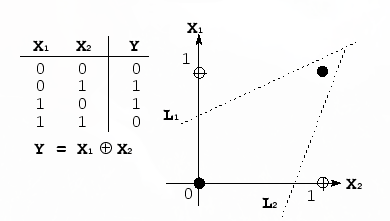

In [45]:
def XOR_net(x):
    gate_1 = AND_percep(x)
    gate_2 = NOT_percep(gate_1)
    gate_3 = OR_percep(x)
    new_x = np.array([gate_2, gate_3])
    output = AND_percep(new_x)
    return output

print("XOR({}, {}) = {}".format(1, 1, XOR_net(example1)))
print("XOR({}, {}) = {}".format(1, 0, XOR_net(example2)))
print("XOR({}, {}) = {}".format(0, 1, XOR_net(example3)))
print("XOR({}, {}) = {}".format(0, 0, XOR_net(example4)))

XOR(1, 1) = 0
XOR(1, 0) = 1
XOR(0, 1) = 1
XOR(0, 0) = 0


## Perceptron Learning Algorithm

In [14]:
class Perceptron(object):

    def __init__(self, no_of_inputs, epochs=100, learning_rate=0.5):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
        
    def predict(self, x):
        summation = np.dot(x, self.weights[1:]) + self.weights[0]
        if summation > 0:
            activation = 1
        else:
            activation = 0            
        return activation
    
    def predict_batch(self,batch):
        summation = np.dot(batch,self.weights[1:]) + self.weights[0]
        summation[np.where(summation>0)] = 1
        summation[np.where(summation<=0)] = 0
        return summation
    
    def train(self, training_inputs, labels):
        counter = 0
        for _ in range(self.epochs):
            for x, y in zip(training_inputs, labels):
                prediction = self.predict(x)
                self.weights[1:] += self.learning_rate * (y - prediction) * x
                self.weights[0] += self.learning_rate * (y - prediction)


### Generate Dataset

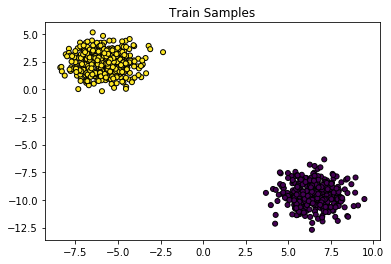

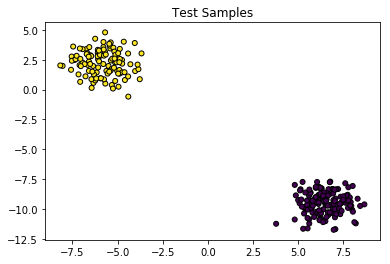

In [15]:
np.random.seed(52)
X, Y = make_blobs(n_samples=1000, n_features=2, centers=2)
X_train,X_test,y_train,y_test = train_test_split(X,Y)

plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train,
            s=25, edgecolor='k');
plt.title("Train Samples")
plt.show()
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test,
            s=25, edgecolor='k');
plt.title("Test Samples")
plt.show()

### Train Our Perceptron

In [16]:
perceptron = Perceptron(no_of_inputs=2)
perceptron.train(X_train,y_train)
precition = perceptron.predict_batch(X_test)
print("Test accuracy:",accuracy_score(y_test,precition))

Test accuracy: 1.0


### Line For Separation

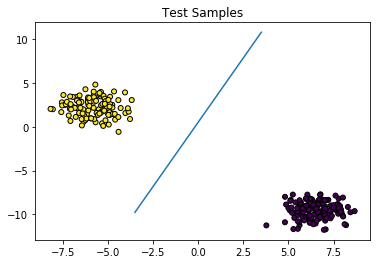

In [17]:
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test,
            s=25, edgecolor='k');
plt.title("Test Samples")

x = np.linspace(-3.5,3.5)
y = -perceptron.weights[1]*x+perceptron.weights[0]
plt.plot(x,y)
plt.show()